Dữ liệu Huấn luyện: 30 năm (1985 - 2014)
Dữ liệu Kiểm thử:   5 năm (2015 - 2019)

--- KẾT QUẢ ĐÁNH GIÁ ĐỘ CHÍNH XÁC (RMSE, MAE, R²) ---
MAE (Sai số tuyệt đối trung bình):   82,572,433,630 USD
RMSE (Sai số căn bậc hai trung bình): 84,546,014,705 USD
R² (Độ phù hợp - R Squared):          -10.2010
(Lưu ý: R² thấp hoặc âm ở Linear Regression cho thấy mô hình đường thẳng 
không bắt kịp đà tăng trưởng mạnh của GDP thực tế)

--- DỰ BÁO TĂNG TRƯỞNG TRUNG HẠN (2020 - 2024) ---
Năm 2020: 202,028,818,402 USD
Năm 2021: 208,845,009,177 USD
Năm 2022: 215,661,199,953 USD
Năm 2023: 222,477,390,728 USD
Năm 2024: 229,293,581,504 USD


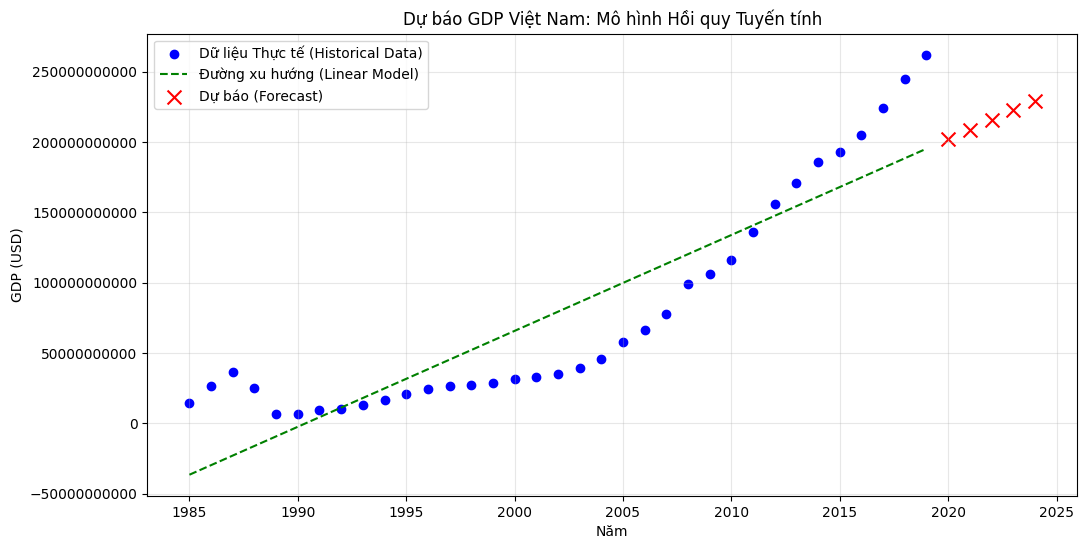

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. ĐỌC VÀ TIỀN XỬ LÝ DỮ LIỆU
# ---------------------------------------------------------
df = pd.read_csv('GDPcompare.csv')
# Lọc lấy dữ liệu Việt Nam và bỏ các giá trị rỗng (NaN)
data = df[['Year', 'Vietnam']].dropna()

# Chuyển đổi sang dạng mảng numpy để đưa vào mô hình
X = data[['Year']].values
y = data['Vietnam'].values

# 2. CHIA TẬP DỮ LIỆU (TRAIN/TEST SPLIT)
# ---------------------------------------------------------
# Để đánh giá chính xác, "giấu" đi 5 năm cuối (2015-2019) làm tập Test
n_test = 5 
X_train = X[:-n_test] # Dữ liệu từ 1985 đến 2014
y_train = y[:-n_test]
X_test = X[-n_test:]  # Dữ liệu từ 2015 đến 2019 (để kiểm tra)
y_test = y[-n_test:]

print(f"Dữ liệu Huấn luyện: {len(X_train)} năm ({X_train[0][0]} - {X_train[-1][0]})")
print(f"Dữ liệu Kiểm thử:   {len(X_test)} năm ({X_test[0][0]} - {X_test[-1][0]})")

# 3. HUẤN LUYỆN & ĐÁNH GIÁ MÔ HÌNH
# ---------------------------------------------------------
# Xây dựng mô hình trên tập Train
model_eval = LinearRegression()
model_eval.fit(X_train, y_train)

# Dự báo thử lại trên tập Test (tập chưa từng nhìn thấy)
y_pred_test = model_eval.predict(X_test)

# Tính toán các chỉ số đánh giá sai số
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print("\n--- KẾT QUẢ ĐÁNH GIÁ ĐỘ CHÍNH XÁC (RMSE, MAE, R²) ---")
print(f"MAE (Sai số tuyệt đối trung bình):   {mae:,.0f} USD")
print(f"RMSE (Sai số căn bậc hai trung bình): {rmse:,.0f} USD")
print(f"R² (Độ phù hợp - R Squared):          {r2:.4f}")
print("(Lưu ý: R² thấp hoặc âm ở Linear Regression cho thấy mô hình đường thẳng \nkhông bắt kịp đà tăng trưởng mạnh của GDP thực tế)")

# 4. THỰC NGHIỆM DỰ BÁO TƯƠNG LAI
# ---------------------------------------------------------
# Sau khi đánh giá xong, train lại mô hình trên TOÀN BỘ dữ liệu (cả Train + Test)
# để có kết quả dự báo tốt nhất cho tương lai.
model_final = LinearRegression()
model_final.fit(X, y)

# Tạo mảng năm tương lai (2020 - 2024)
last_year = int(data['Year'].max())
future_years = np.arange(last_year + 1, last_year + 6).reshape(-1, 1)
future_gdp = model_final.predict(future_years)

print("\n--- DỰ BÁO TĂNG TRƯỞNG TRUNG HẠN (2020 - 2024) ---")
for year, val in zip(future_years.flatten(), future_gdp):
    print(f"Năm {year}: {val:,.0f} USD")

# 5. VẼ BIỂU ĐỒ SO SÁNH
# ---------------------------------------------------------
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.scatter(X, y, color='blue', label='Dữ liệu Thực tế (Historical Data)')

# Vẽ đường hồi quy (Trendline)
plt.plot(X, model_final.predict(X), color='green', linestyle='--', label='Đường xu hướng (Linear Model)')

# Vẽ các điểm dự báo tương lai
plt.scatter(future_years, future_gdp, color='red', marker='x', s=100, label='Dự báo (Forecast)')

plt.title('Dự báo GDP Việt Nam: Mô hình Hồi quy Tuyến tính')
plt.xlabel('Năm')
plt.ylabel('GDP (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='plain', axis='y') # Hiển thị số đầy đủ thay vì 1e11

plt.show()